# Import Libraries

In [1]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from IPython.core.display import display,HTML
import keras 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import os

# Prepare Data(Picture)

In [2]:
file_path = os.getcwd()
print(file_path)

C:\Users\PNCOM\Desktop\ML\MLPC\pokemon-v3 CNN


In [3]:
#Import test/train pictures
imgfiles = [i for i in os.listdir(file_path) if i.startswith("TT")]
print(imgfiles)

['TTflying01.png', 'TTflying02.png', 'TTflying03.png', 'TTflying04.png', 'TTflying05.png', 'TTflying06.png', 'TTflying07.png', 'TTflying08.png', 'TTflying09.png', 'TTflying10.png', 'TTflying11.png', 'TTflying12.png', 'TTflying13.png', 'TTflying14.png', 'TTflying15.png', 'TTflying16.png', 'TTflying17.png', 'TTflying18.png', 'TTflying19.png', 'TTflying20.png', 'TTflying21.png', 'TTflying22.png', 'TTflying23.png', 'TTflying24.png', 'TTflying25.png', 'TTflying26.png', 'TTflying27.png', 'TTflying28.png', 'TTflying29.png', 'TTflying30.png', 'TTflying31.png', 'TTflying32.png', 'TTflying33.png', 'TTflying34.png', 'TTflying35.png', 'TTflying36.png', 'TTflying37.png', 'TTflying38.png', 'TTflying39.png', 'TTflying40.png', 'TTflying41.png', 'TTflying42.png', 'TTflying43.png', 'TTflying44.png', 'TTflying45.png', 'TTn-flying01.png', 'TTn-flying02.png', 'TTn-flying03.png', 'TTn-flying04.png', 'TTn-flying05.png', 'TTn-flying06.png', 'TTn-flying07.png', 'TTn-flying08.png', 'TTn-flying09.png', 'TTn-flyi

In [4]:
j = 0
picture = np.zeros((90, 10000))

for i in imgfiles:
    img = Image.open(i).convert('L')
    img = ImageOps.invert(img)
    img = img.resize((100,100), Image.ANTIALIAS)
    pixel = np.array(img)
    pixel = pixel/255*16
    pixel = pixel.astype('int')
    picture[j,:] = pixel.reshape(1,-1)
    j = j+1

# Check Picture

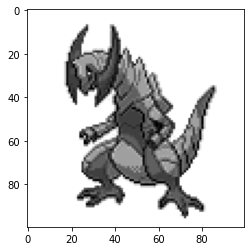

In [5]:
fig = plt.figure(figsize = (4, 4))
plt.imshow(picture[71].reshape(100, 100), cmap=plt.cm.binary )

# Input type of  each picture

In [6]:
# "0" = Flying , "1" = Non-Flying
y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
      ,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [7]:
print(len(y))

90


# Split Data into train-test set

In [8]:
X = picture
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=7 )

In [9]:
X_train.shape

(72, 10000)

In [10]:
X_train = X_train.reshape(-1, 100, 100, 1)
X_test = X_test.reshape(-1, 100, 100, 1)
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')
#X_train = X_train/255
#X_test = X_test/255

y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

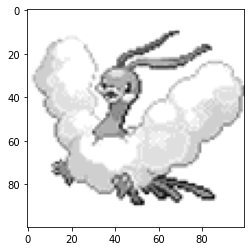

In [11]:
#Check Picture
plt.imshow(X_test[10], cmap = plt.cm.binary)
plt.show()

In [12]:
#check Shape
print(X_train.shape)
print(y_test1)

(72, 100, 100, 1)
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [13]:
print(len(X_test))
print(len(y_test))
print(len(X_train))
print(len(y_train))

18
18
72
72


# Fit model & Prediction

In [14]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = (100, 100, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D (pool_size = (2, 2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D (pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile (loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])
model.fit (X_train, y_train1,batch_size = 20, epochs = 15)

Epoch 1/15
4/4 [==============================] - 1s 142ms/step - loss: 9.6707 - accuracy: 0.6806
Epoch 2/15
4/4 [==============================] - 1s 129ms/step - loss: 2.2350 - accuracy: 0.7917
Epoch 3/15
4/4 [==============================] - 1s 126ms/step - loss: 0.2987 - accuracy: 0.9028
Epoch 4/15
4/4 [==============================] - 1s 127ms/step - loss: 0.0731 - accuracy: 0.9583
Epoch 5/15
4/4 [==============================] - 1s 141ms/step - loss: 0.0564 - accuracy: 0.9722
Epoch 6/15
4/4 [==============================] - 1s 153ms/step - loss: 0.0225 - accuracy: 1.0000
Epoch 7/15
4/4 [==============================] - 1s 164ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 8/15
4/4 [==============================] - 1s 130ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 9/15
4/4 [==============================] - 0s 121ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 10/15
4/4 [==============================] - 1s 140ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 11/15
4/4 [==

In [15]:
#Accuracy
test_loss, test_acc = model.evaluate(X_test, y_test1)
print('Test loss', test_loss)
print('Test acc', test_acc)

1/1 [==============================] - 0s 450us/step - loss: 0.1528 - accuracy: 0.9444
Test loss 0.15275992453098297
Test acc 0.9444444179534912


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [17]:
predictions = model.predict(X_test)

In [18]:
#Check Shape
print(predictions.shape)

(18, 2)


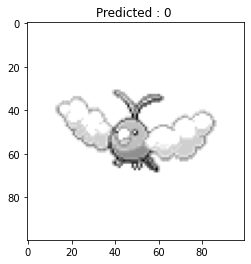

In [19]:
#Check Prediction with picture
plt.imshow(X_test[17].reshape(100,100), cmap = plt.cm.binary)
plt.title('Predicted : {} '.format(np.argmax(np.round(predictions[17]))))
plt.show()

# Predict with unseen pictures

In [20]:
#Import unseen pictures
unseenpic = [i for i in os.listdir(file_path) if i.startswith("UN")]
print(unseenpic)

['UNflyingtest01.png', 'UNflyingtest02.png', 'UNflyingtest03.png', 'UNflyingtest04.png', 'UNflyingtest05.png', 'UNflyingtest06.png', 'UNflyingtest07.png', 'UNflyingtest08.png', 'UNn-flyingtest01.png', 'UNn-flyingtest02.png', 'UNn-flyingtest03.png', 'UNn-flyingtest04.png', 'UNn-flyingtest05.png', 'UNn-flyingtest06.png', 'UNn-flyingtest07.png', 'UNn-flyingtest08.png']


In [21]:
k=0
testpic = np.zeros((16, 10000))

for i in unseenpic:
    img = Image.open(i).convert('L')
    img = ImageOps.invert(img)
    img = img.resize((100,100), Image.ANTIALIAS)
    pixel = np.array(img)
    pixel = pixel/255.0 * 16
    pixel = pixel.astype('int')
    testpic[k,:] = pixel.reshape(1,-1)
    Xu = testpic.reshape(16,100,100,1)
    #Xu = Xu.astype('float32')
    #Xu = Xu/255
    predicttest = model.predict(Xu)
    k = k+1

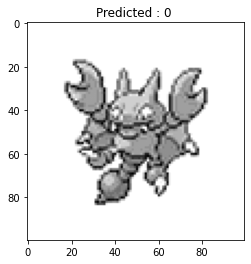

In [22]:
#Check prediction with picture
plt.imshow(Xu[6].reshape(100,100), cmap = plt.cm.binary)
plt.title('Predicted : {} '.format(np.argmax(np.round(predicttest[6]))))
plt.show()

In [23]:
#Turn (n,2) into (n,1) & Change "0" -> "Flying" , "1" -> "Non-Flying"
print(predicttest.shape)
y_array = []
for i in range(16):
    y_unseen = np.argmax(np.round(predicttest[i]))
    if y_unseen == 0:
        y_array.append('Flying')
    else:
        y_array.append('Non-Flying')
print(y_array)


(16, 2)
['Flying', 'Flying', 'Flying', 'Flying', 'Flying', 'Flying', 'Flying', 'Flying', 'Non-Flying', 'Non-Flying', 'Non-Flying', 'Non-Flying', 'Non-Flying', 'Non-Flying', 'Non-Flying', 'Non-Flying']


In [24]:
#Create table 
df = pd.DataFrame(columns = ['Files'])
images = ['https://img.pokemondb.net/sprites/black-white/normal/lugia.png',
          'https://img.pokemondb.net/sprites/black-white/normal/braviary.png',
         'https://img.pokemondb.net/sprites/black-white/normal/venomoth.png',
          'https://img.pokemondb.net/sprites/diamond-pearl/normal/pelipper.png',
         'https://img.pokemondb.net/sprites/diamond-pearl/normal/xatu-f.png',
          'https://img.pokemondb.net/sprites/black-white/normal/togekiss.png',
          'https://img.pokemondb.net/sprites/diamond-pearl/normal/gligar-f.png',
          'https://img.pokemondb.net/sprites/black-white/normal/yanma.png',
          'https://img.pokemondb.net/sprites/black-white/normal/bisharp.png',
         'https://img.pokemondb.net/sprites/black-white/normal/genesect.png',
          'https://img.pokemondb.net/sprites/black-white/normal/floatzel.png',
         'https://img.pokemondb.net/sprites/black-white/normal/fraxure.png',
         'https://img.pokemondb.net/sprites/black-white/normal/sceptile.png',
         'https://img.pokemondb.net/sprites/black-white/normal/registeel.png',
         'https://img.pokemondb.net/sprites/black-white/normal/wigglytuff.png',
         'https://img.pokemondb.net/sprites/black-white/normal/typhlosion.png'] 

df['Images'] = images

def path_to_image_html(path):
    return '<img src="'+ path + '" width="80" >'

df['Files'] = unseenpic
df['Predicted'] = y_array

display(HTML(df.to_html(escape=False ,formatters=dict(Images=path_to_image_html))))
display

,Files,Images,Predicted
0,UNflyingtest01.png,,Flying
1,UNflyingtest02.png,,Flying
2,UNflyingtest03.png,,Flying
3,UNflyingtest04.png,,Flying
4,UNflyingtest05.png,,Flying
5,UNflyingtest06.png,,Flying
6,UNflyingtest07.png,,Flying
7,UNflyingtest08.png,,Flying
8,UNn-flyingtest01.png,,Non-Flying
9,UNn-flyingtest02.png,,Non-Flying


<function IPython.core.display.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, **kwargs)>